<a href="https://www.kaggle.com/code/yuvannabawa/running-injury-prediction?scriptVersionId=115959965" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/injury-prediction-for-competitive-runners/day_approach_maskedID_timeseries.csv
/kaggle/input/injury-prediction-for-competitive-runners/week_approach_maskedID_timeseries.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/injury-prediction-for-competitive-runners/week_approach_maskedID_timeseries.csv")

In [4]:
df.head(10)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
5,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,5
6,6.0,1.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,6
7,5.0,2.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,7
8,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,8
9,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,9


In [5]:
df.columns

Index(['nr. sessions', 'nr. rest days', 'total kms', 'max km one day',
       'total km Z3-Z4-Z5-T1-T2',
       'nr. tough sessions (effort in Z5, T1 or T2)',
       'nr. days with interval session', 'total km Z3-4',
       'max km Z3-4 one day', 'total km Z5-T1-T2', 'max km Z5-T1-T2 one day',
       'total hours alternative training', 'nr. strength trainings',
       'avg exertion', 'min exertion', 'max exertion', 'avg training success',
       'min training success', 'max training success', 'avg recovery',
       'min recovery', 'max recovery', 'nr. sessions.1', 'nr. rest days.1',
       'total kms.1', 'max km one day.1', 'total km Z3-Z4-Z5-T1-T2.1',
       'nr. tough sessions (effort in Z5, T1 or T2).1',
       'nr. days with interval session.1', 'total km Z3-4.1',
       'max km Z3-4 one day.1', 'total km Z5-T1-T2.1',
       'max km Z5-T1-T2 one day.1', 'total hours alternative training.1',
       'nr. strength trainings.1', 'avg exertion.1', 'min exertion.1',
       'max exertion.

In [6]:
df.isnull().sum()

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

In [7]:
df.nunique()

nr. sessions                  15
nr. rest days                  8
total kms                   1772
max km one day               395
total km Z3-Z4-Z5-T1-T2      493
                           ...  
injury                         2
rel total kms week 0_1     31692
rel total kms week 0_2     32434
rel total kms week 1_2     31473
Date                        2614
Length: 72, dtype: int64

In [8]:
df['injury'].nunique()

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

In [10]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


<AxesSubplot:>

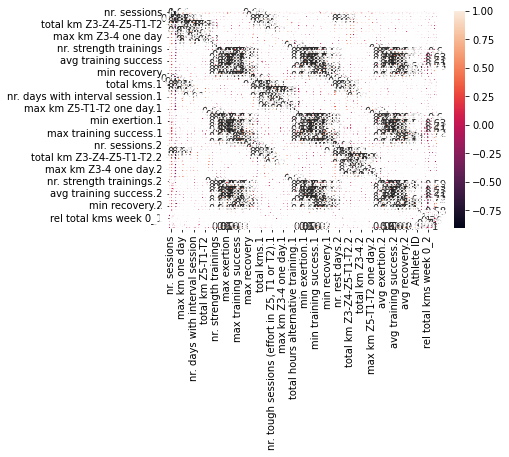

In [11]:
cor = df.corr()
sns.heatmap(cor, annot=True)

In [12]:
df.tail()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
42793,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.80,0.20,0.12,0.26,71,1,2.479167,1.101852,0.444444,2143
42794,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.12,0.12,0.12,71,1,1.054545,1.288889,1.222222,2286
42795,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.93,0.32,0.17,0.62,71,1,0.750980,0.743689,0.990291,2483
42796,5.0,2.0,67.0,15.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.91,0.28,0.22,0.41,71,1,2.005988,1.238447,0.617375,2647
42797,4.0,3.0,45.0,12.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.88,0.16,0.05,0.21,71,1,1.011236,1.022727,1.011364,2673


In [13]:
df.shape

(42798, 72)

In [14]:
df['injury'].unique()

array([0, 1])

In [15]:
df['injury'].value_counts()

0    42223
1      575
Name: injury, dtype: int64

In [16]:
df['nr. sessions'].unique()

array([ 5.,  6.,  7.,  4.,  3.,  2.,  8.,  9., 10.,  1.,  0., 11., 12.,
       13., 14.])

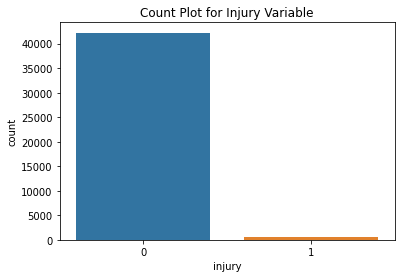

In [17]:
# injury is a categorical variable
plt.title("Count Plot for Injury Variable")
sns.countplot(x='injury', data=df)
plt.show()

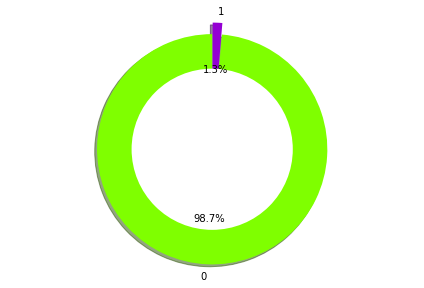

In [18]:
injury_data_count = df['injury'].value_counts()
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
colors = ['#7FFF00', '#9400D3']
ax1.pie(injury_data_count, colors = colors, explode=explode, labels=injury_data_count.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [19]:
df['Athlete ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In [20]:
df['Athlete ID'].value_counts()

32    1791
20    1737
22    1478
43    1471
41    1393
      ... 
66     148
39     129
15     126
55      48
60      43
Name: Athlete ID, Length: 74, dtype: int64

In [21]:
dfc = df.copy()

In [22]:
dfc = dfc.set_index('Athlete ID')

In [23]:
dfc.head()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
Athlete ID,,,,,,,,,,,,,,,,,,,,,
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.0,0.18,0.16,0.20,0,0.718447,1.378882,1.919255,0
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.18,0.16,0.20,0,0.683544,1.018868,1.490566,1
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.17,0.16,0.18,0,0.683544,1.018868,1.490566,2
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.0,0.18,0.16,0.18,0,0.683544,1.018868,1.490566,3
0,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.0,0.17,0.16,0.18,0,2.202247,1.361111,0.618056,4


In [24]:
dfc.isnull().sum()

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 71, dtype: int64

In [25]:
dfc.duplicated().sum()

343

In [26]:
dfc.duplicated()

Athlete ID
0     False
0     False
0     False
0     False
0     False
      ...  
71    False
71    False
71    False
71    False
71    False
Length: 42798, dtype: bool

In [27]:
dfc = dfc.drop_duplicates()

In [28]:
dfc.duplicated().sum()

0

In [29]:
dfc.shape

(42455, 71)

In [30]:
df.shape

(42798, 72)

In [31]:
df1 = dfc[dfc['injury'] == 0]
df2 = dfc[dfc['injury'] == 1]

Text(0.5, 1.0, 'Sessions by injury')

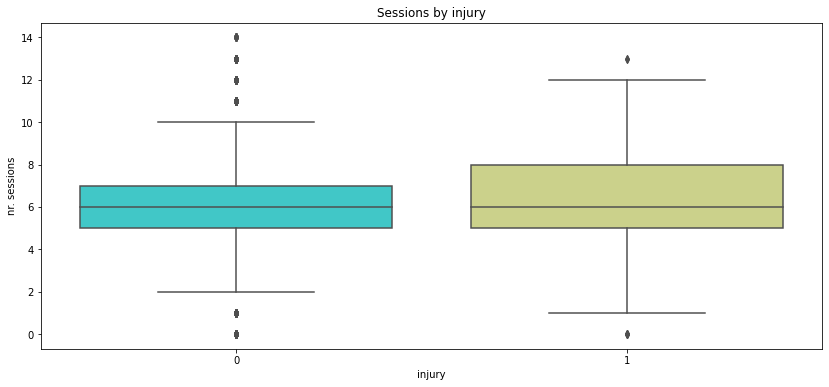

In [32]:
plt.figure(figsize=(14,6))
sns.boxplot(x='injury', y='nr. sessions', data=dfc, palette='rainbow')
plt.title("Sessions by injury")

Text(0.5, 1.0, 'Sessions by injury')

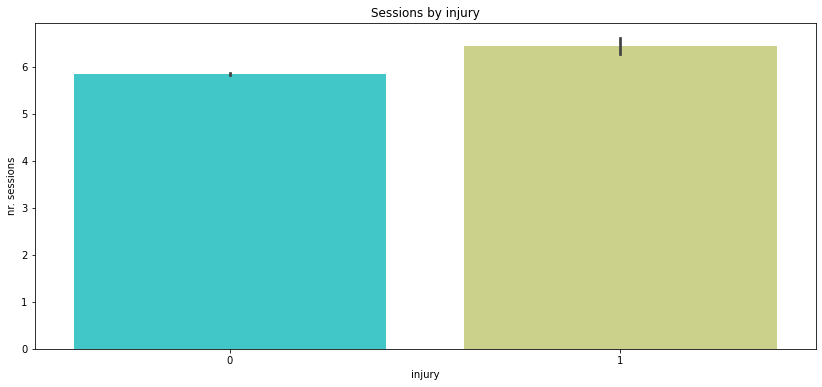

In [33]:
plt.figure(figsize=(14,6))
sns.barplot(x='injury', y='nr. sessions', data=dfc, palette='rainbow')
plt.title("Sessions by injury")

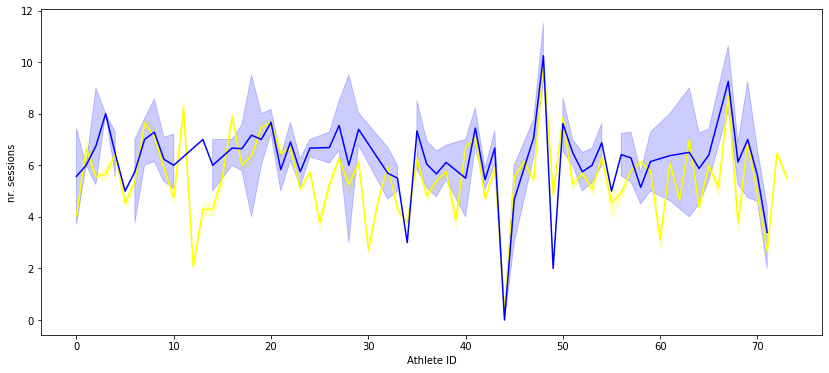

In [34]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['nr. sessions'], color='yellow')
sns.lineplot(data=df2['nr. sessions'], color='blue')
plt.show()

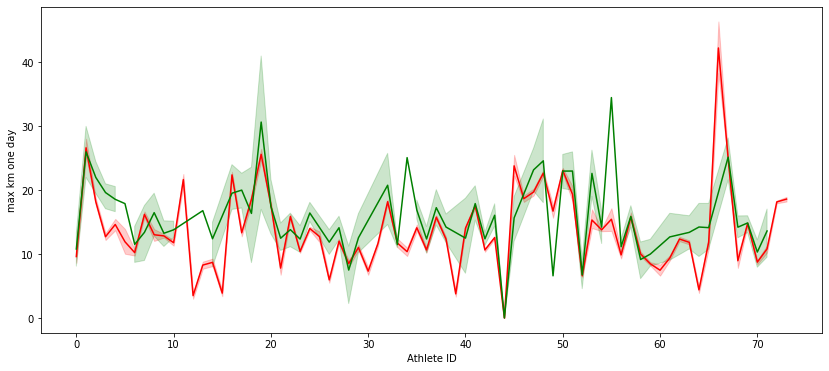

In [35]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['max km one day'], color='red')
sns.lineplot(data=df2['max km one day'], color='green')
plt.show()

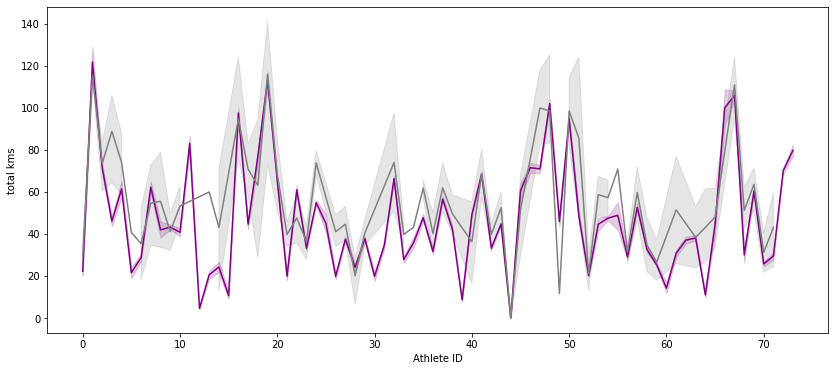

In [36]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['total kms'], color='purple')
sns.lineplot(data=df2['total kms'], color='grey')
plt.show()

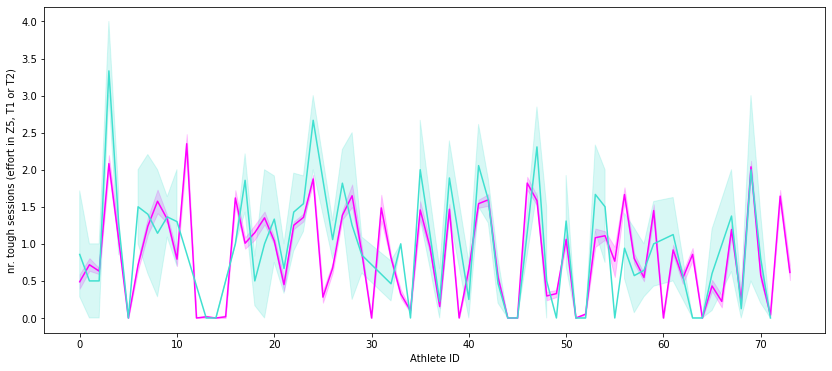

In [37]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['nr. tough sessions (effort in Z5, T1 or T2)'], color='magenta')
sns.lineplot(data=df2['nr. tough sessions (effort in Z5, T1 or T2)'], color='turquoise')
plt.show()

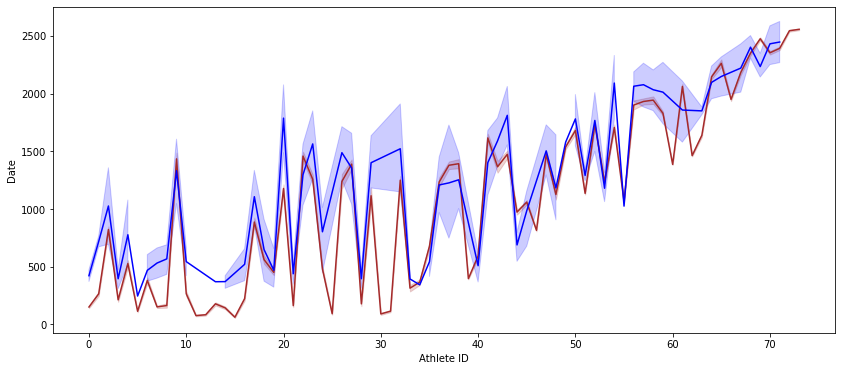

In [38]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df1['Date'], color='brown')
sns.lineplot(data=df2['Date'], color='blue')
plt.show()

In [39]:
y = dfc['injury']
x = dfc.drop('injury', axis=1)

In [40]:
x

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,avg training success.2,min training success.2,max training success.2,avg recovery.2,min recovery.2,max recovery.2,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
Athlete ID,,,,,,,,,,,,,,,,,,,,,
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.00,0.00,0.00,0.18,0.16,0.20,0.718447,1.378882,1.919255,0
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.18,0.16,0.20,0.683544,1.018868,1.490566,1
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.17,0.16,0.18,0.683544,1.018868,1.490566,2
0,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.00,0.00,0.00,0.18,0.16,0.18,0.683544,1.018868,1.490566,3
0,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.00,0.00,0.00,0.17,0.16,0.18,2.202247,1.361111,0.618056,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.0,3.0,59.5,19.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.76,0.66,0.80,0.20,0.12,0.26,2.479167,1.101852,0.444444,2143
71,1.0,6.0,5.8,5.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.85,0.85,0.12,0.12,0.12,1.054545,1.288889,1.222222,2286
71,3.0,4.0,38.3,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.75,0.50,0.93,0.32,0.17,0.62,0.750980,0.743689,0.990291,2483


In [41]:
y

Athlete ID
0     0
0     0
0     0
0     0
0     0
     ..
71    1
71    1
71    1
71    1
71    1
Name: injury, Length: 42455, dtype: int64

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [43]:
from xgboost import XGBClassifier

In [44]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(x, y)


In [45]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
 test_size = 0.3,
 random_state = 0)


In [47]:
knn= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [48]:
y_pred_knn= knn.predict(X_test)


In [49]:
confm_knn = confusion_matrix(y_test, y_pred_knn)


In [50]:
confm_knn

array([[10888,  1538],
       [   12, 12690]])

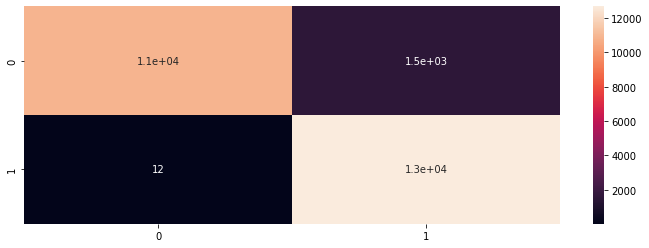

In [51]:
plt.figure(figsize=(12,4))
sns.heatmap(confm_knn, annot=True)
plt.show()

In [52]:
print(accuracy_score(y_test, y_pred_knn))

0.9383158229863101


In [53]:
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(y_test, Y_pred))

[[12404    22]
 [  686 12016]]


In [54]:
print(accuracy_score(y_test, Y_pred))

0.9718242597898759


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, stratify = y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10470     0]
 [  539  9931]]


In [56]:
print(accuracy_score(Y_test, Y_pred))

0.9742597898758357


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=0)


In [58]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
print(confusion_matrix(Y_test, y_pred_lr))

[[7912 4514]
 [4083 8619]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [59]:
print(accuracy_score(Y_test, y_pred_lr))

0.6578716969118116


In [60]:
rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
rf.fit(X_train, Y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [61]:
y_pred_rf = rf.predict(X_test)

In [62]:
print(confusion_matrix(Y_test, y_pred_rf))

[[12416    10]
 [  180 12522]]


In [63]:
print(accuracy_score(Y_test, y_pred_rf))

0.9924387137854187


In [64]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     12426
           1       1.00      0.99      0.99     12702

    accuracy                           0.99     25128
   macro avg       0.99      0.99      0.99     25128
weighted avg       0.99      0.99      0.99     25128



In [65]:
confm_rf = confusion_matrix(Y_test, y_pred_rf)

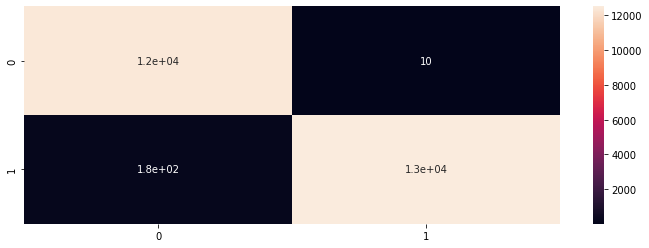

In [66]:
plt.figure(figsize=(12,4))
sns.heatmap(confm_rf, annot=True)
plt.show()

It can be seen that Random Forest classifier gives the best accuracy score ( of 99% ) out of all. Therefore, the classifier which has the best accuracy is Random  forest with oversampling ( SMOTE ). 

**If anybody has suggestions on how to improve my work, it would be appreciated :)**